In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("train.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.drop("Loan_ID",axis=1,inplace=True)

In [8]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

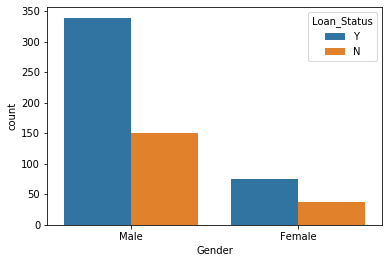

In [11]:
sns.countplot(x='Gender',data=data,hue='Loan_Status')

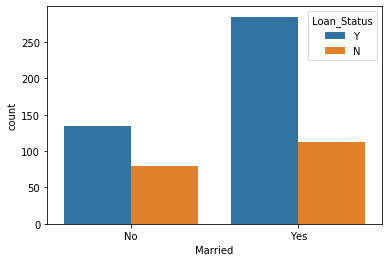

In [26]:
sns.countplot(x='Married',data=data,hue='Loan_Status')

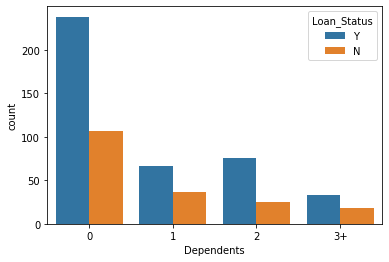

In [27]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status')

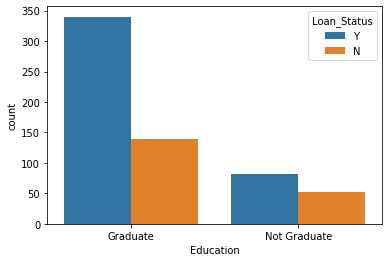

In [28]:
sns.countplot(x='Education',data=data,hue='Loan_Status')

# Encoding categorical features

In [29]:
data_encoded=pd.get_dummies(data,drop_first=True)

In [31]:
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [41]:
data_encoded.isnull().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term           14
Credit_History             50
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64

In [39]:
data_encoded['LoanAmount'].mean()

146.41216216216216

In [40]:
data_encoded.LoanAmount=data_encoded.fillna(data_encoded['LoanAmount'].mean())

In [42]:
data_encoded.Loan_Amount_Term=data_encoded.fillna(data_encoded['Loan_Amount_Term'].mean())

In [43]:
data_encoded.Credit_History=data_encoded.fillna(data_encoded['Credit_History'].mean())

In [44]:
data_encoded.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [46]:
X=data_encoded.drop(columns='Loan_Status_Y')
y=data_encoded['Loan_Status_Y']

In [47]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,5849.0,5849.0,5849.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,4583.0,4583.0,4583.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,3000.0,3000.0,3000.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,2583.0,2583.0,2583.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,6000.0,6000.0,6000.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,2900.0,2900.0,2900.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,4106.0,4106.0,4106.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,8072.0,8072.0,8072.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,7583.0,7583.0,7583.0,1,1,0,1,0,0,0,0,1


In [48]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape

(491, 14)

In [51]:
X_test.shape

(123, 14)

In [52]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [53]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
y_predictt=clf.predict(X_train)

In [56]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
83,6000,2250.0,6000.0,6000.0,6000.0,1,1,0,0,0,0,0,1,0
90,2958,2900.0,2958.0,2958.0,2958.0,1,1,0,0,0,0,0,1,0
227,6250,1695.0,6250.0,6250.0,6250.0,1,1,0,1,0,0,0,1,0
482,2083,3150.0,2083.0,2083.0,2083.0,1,1,0,0,0,0,0,1,0
464,4166,0.0,4166.0,4166.0,4166.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1875,1875.0,1875.0,1875.0,1875.0,1,1,0,1,0,1,1,1,0
106,11417,1126.0,11417.0,11417.0,11417.0,1,1,0,1,0,0,0,0,1
270,3237,0.0,3237.0,3237.0,3237.0,0,0,0,0,0,0,0,0,1
435,10047,0.0,10047.0,10047.0,10047.0,0,0,0,0,0,0,0,1,0


In [60]:
y_predictt

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [61]:
from sklearn.metrics import accuracy_score
acc=accuracy_score

In [62]:
print('accuracy:',acc(y_train,y_predictt))

accuracy: 0.9938900203665988


In [80]:
tree_clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=35)

In [81]:
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=35, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
y_pred=tree_clf.predict(X_test)

In [86]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['predicted'],margins=True)

predicted,0,1,All
True,,,
0,2,41,43
1,4,76,80
All,6,117,123


# Radndom Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf=RandomForestClassifier()

In [101]:
rf.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
y_predicted=rf.predict(X_train)

In [103]:
acc(y_train,y_predicted)

0.9796334012219959